# Pre-work

## Set-up

In [0]:
!pip install tensorflow==1.2.0
!pip install keras==2.0.9

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

seed = 7
np.random.seed(seed)

import tensorflow as tf
import pandas as pd
from pandas import Series,DataFrame

import io
from io import StringIO

from statistics import mean 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

import collections

from keras import backend as k
# from tensorflow.python.framework import ops
# ops.reset_default_graph()    

     |████████████████████████████████| 35.0MB 86kB/s 
     |████████████████████████████████| 890kB 34.1MB/s 
     |████████████████████████████████| 245kB 48.3MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107221 sha256=f791335e46c0a9e3eaf8cfe6a545f052d57360c7b1aec97e7251991ab4126216
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
  Created wheel for markdown: filename=Markdown-2.2.0-cp36-none-any.whl size=136255 sha256=5a5ba3d96a61014133ec29cfc84e4282cd33d8f5b4db63af41464cef47db1dd9
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
Successfully built html5lib markdown
ERROR: tensorboard 1.15.0 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.2.0 which is incompatible.
ERROR: magenta 0.3.19 has requir

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

## Process Data

In [0]:
def data_process():
  uploaded = files.upload()
  for fn in uploaded.keys():
    fn
  data = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
  data = data.iloc[:, 1:] # remove date col cuz it's meaningless here
  # data['Date_col_name'] = pd.to_datetime(data['Date_col_name'],unit='s') if here is timestamp
  data = data.astype('float64')
  data.info()
  
  return data

In [0]:
Data = data_process()

Saving DryCreek_input_add_label.csv to DryCreek_input_add_label.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 19 columns):
1-day aggregated anomaly LG Mean daily Q m^3/s    6044 non-null float64
LWR_P (precipitation)                             6044 non-null float64
LWR_T (temperature)                               6044 non-null float64
LWR_SWE (snow water equivalent)                   6044 non-null float64
LWR_Melt (snow melt)                              6044 non-null float64
LWR_ET (evapotranspiration)                       6044 non-null float64
TL_P                                              6044 non-null float64
TL_T                                              6044 non-null float64
TL_SWE                                            6044 non-null float64
TL_Melt                                           6044 non-null float64
TL_ET                                             6044 non-null float64
LWR_Soil1 (soil moisture at 10 cm

**feature selection**

*   Univariate selection
*   Recursive Feature Elimination (RFE)
*   Principle Component Analysis (PCA)
*   Choosing important features (feature importance)

Reference:

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

Recursive Feature Elimination (RFE)

In [0]:
Y = Data.iloc[:,0].values
X = Data.iloc[:,1:].values

# feature extraction
'''
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.
'''
model = LinearRegression(fit_intercept=True, normalize=True)
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True False False False False False False False False  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 3 6 4 2 9 5 8 7 1 1 1 1 1 1 1 1 1]


In [0]:
Data.columns

Index(['1-day aggregated anomaly LG Mean daily Q m^3/s',
       'LWR_P (precipitation)', 'LWR_T (temperature)',
       'LWR_SWE (snow water equivalent)', 'LWR_Melt (snow melt)',
       'LWR_ET (evapotranspiration)', 'TL_P', 'TL_T', 'TL_SWE', 'TL_Melt',
       'TL_ET', 'LWR_Soil1 (soil moisture at 10 cm deep)', 'LWR_Soil5',
       'LWR_Soil6', 'LWR_Soil10', 'TL_Soil1', 'TL_Soil5', 'TL_Soil6',
       'TL_Soil10'],
      dtype='object')

In [0]:
for i in range(0,18):
  if fit.support_[i] == True:
    print(list(Data.columns.values)[i+1]) # exclude the label column

LWR_P (precipitation)
TL_ET
LWR_Soil1 (soil moisture at 10 cm deep)
LWR_Soil5
LWR_Soil6
LWR_Soil10
TL_Soil1
TL_Soil5
TL_Soil6
TL_Soil10


Choosing important features (feature importance)

In [0]:
from sklearn.ensemble import RandomForestRegressor

# feature extraction
Y = Data.iloc[:,0].values
X = Data.iloc[:,1:].values
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[0.01290162 0.00753885 0.00231382 0.0005489  0.02286223 0.01459409
 0.00689413 0.02534547 0.00951152 0.02339857 0.04209558 0.34717689
 0.03014404 0.05219507 0.0329863  0.12299139 0.02179429 0.22470724]


In [0]:
for i in range(0,18):
  if model.feature_importances_[i] > 0.02:
    print(list(Data.columns.values)[i+1]) # exclude the label column

LWR_ET (evapotranspiration)
TL_SWE
TL_ET
LWR_Soil1 (soil moisture at 10 cm deep)
LWR_Soil5
LWR_Soil6
LWR_Soil10
TL_Soil1
TL_Soil5
TL_Soil6
TL_Soil10


correlation features

In [0]:
!pip install feature-selector
from feature_selector import FeatureSelector

In [0]:
fs = FeatureSelector(data = Data, labels = Data.iloc[:,0])
fs.identify_collinear(correlation_threshold = 0.90)

6 features with a correlation magnitude greater than 0.90.



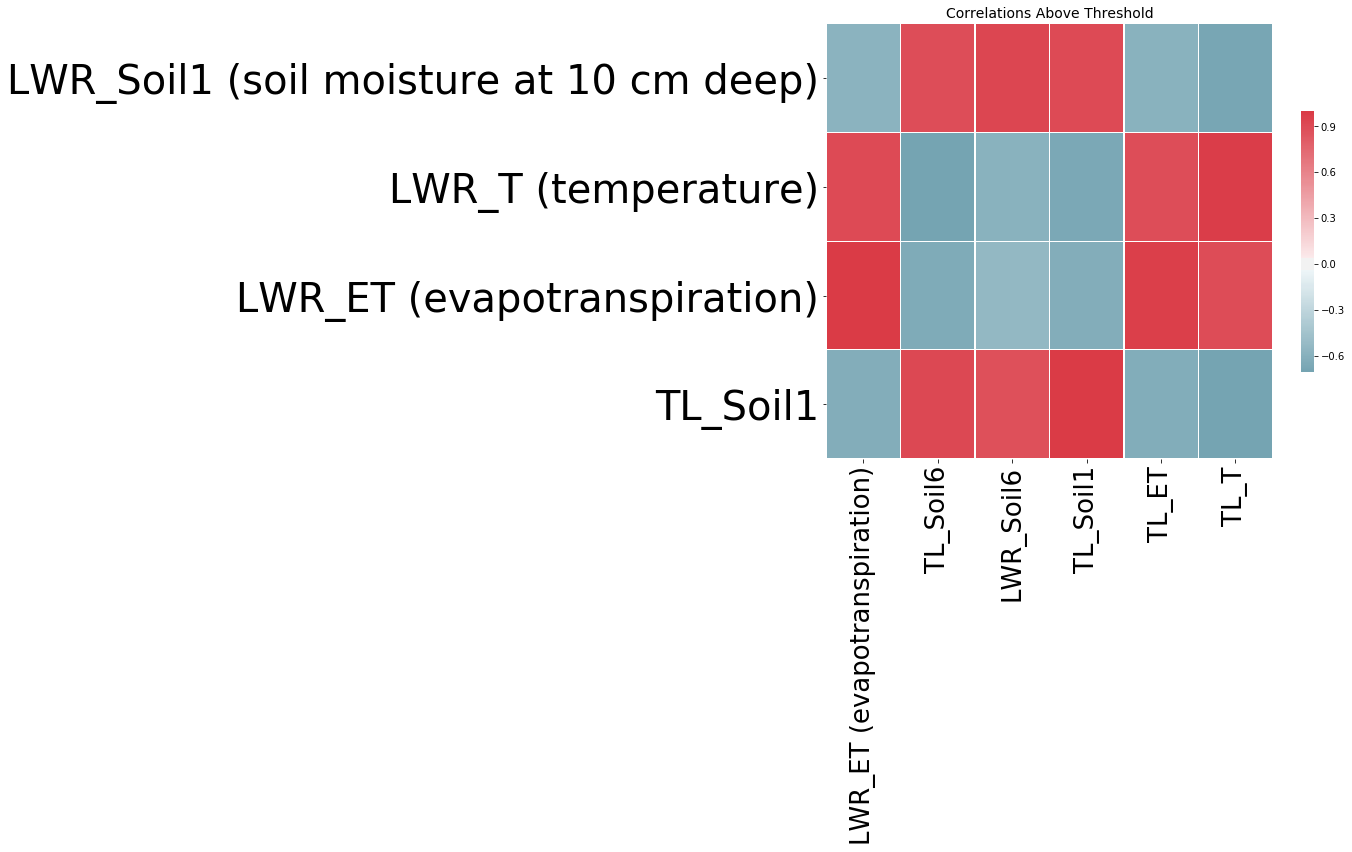

In [0]:
fs.plot_collinear()

In [0]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,LWR_ET (evapotranspiration),LWR_T (temperature),0.905802
1,TL_T,LWR_T (temperature),0.979716
2,TL_ET,LWR_ET (evapotranspiration),0.970539
3,LWR_Soil6,LWR_Soil1 (soil moisture at 10 cm deep),0.929765
4,TL_Soil1,LWR_Soil1 (soil moisture at 10 cm deep),0.902479


In [0]:
Data = Data.drop(['TL_T', 'TL_ET', 'LWR_ET (evapotranspiration)', 'LWR_Soil6', 'TL_Soil1'], axis=1)

In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 14 columns):
1-day aggregated anomaly LG Mean daily Q m^3/s    6044 non-null float64
LWR_P (precipitation)                             6044 non-null float64
LWR_T (temperature)                               6044 non-null float64
LWR_SWE (snow water equivalent)                   6044 non-null float64
LWR_Melt (snow melt)                              6044 non-null float64
TL_P                                              6044 non-null float64
TL_SWE                                            6044 non-null float64
TL_Melt                                           6044 non-null float64
LWR_Soil1 (soil moisture at 10 cm deep)           6044 non-null float64
LWR_Soil5                                         6044 non-null float64
LWR_Soil10                                        6044 non-null float64
TL_Soil5                                          6044 non-null float64
TL_Soil6                     

**Visualize data**

what color do you want? b


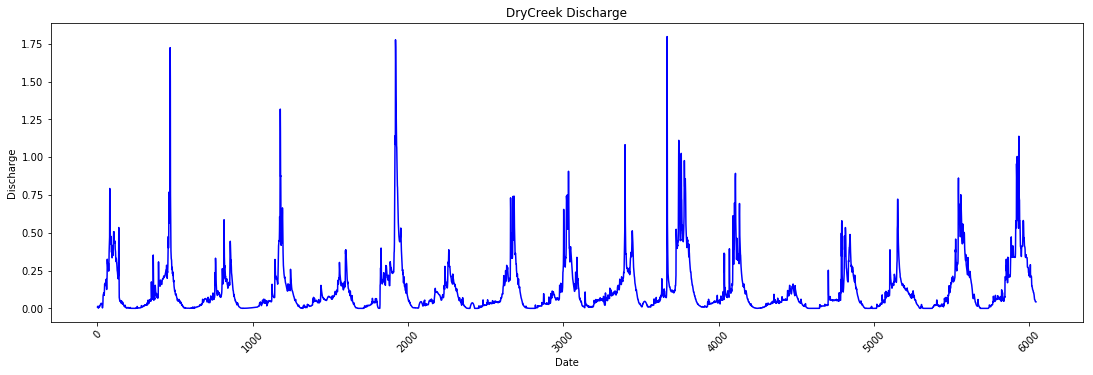

In [0]:
# plot the overall data
# Data.plot(figsize=(18,7))

# create the plot space upon which to plot the data
fig, ax= plt.subplots()

# add the x-axis and the y-axis to the plot
ax.plot(Data['1-day aggregated anomaly LG Mean daily Q m^3/s'], 
        color = input('what color do you want? '))

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge",
       title="DryCreek Discharge");

# set plot size
fig.set_size_inches(18.5, 5.5)

# Nested Cross Validation

**Day Forward-Chaining Nested Cross-Validation**

![alt text](https://miro.medium.com/max/2056/1*2-zaRQ-dsv8KWxOlzc8VaA.png)
*source: https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9*

Here, I implement 4-1, 8-1, 12-1, 15.5-1 (in yrs) as training set vs.testing set

# Multivariate LSTM Time Series Model

The model without considering lagging and previous label data that we already tried before has huge error, thus here I only cover the LSTM model considering lagging and previous label data.

## Set-up

In [0]:
def NS(o,s): # the larger the value, the better the prediction
    """
    Nash Sutcliffe efficiency coefficient
    input:
        s: simulated
        o: observed
    output:
        ns: Nash Sutcliffe efficient coefficient
    """
    eps = 1e-5
#    return 1 - sum((np.log(s+eps)-np.log(o+eps))**2)/sum((np.log(o+eps)-np.mean(np.log(o+eps)))**2) 
    return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)

In [0]:
def scale_data(data):
  
  # Scale the data

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

In [0]:
def to_supervised(scaled, dropNa, lag):

    df = pd.DataFrame(scaled)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    
    # drop rows with missing values
    df.dropna(inplace = True)
    
    # specify columns for input and output pairs
    features = scaled.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    
    return supervised_data

In [0]:
def apply_timeSteps(timeSteps):
  values = Data.values
  scaled = scale_data(values)
  supervised = to_supervised(values, True, timeSteps)
  #print(pd.DataFrame(supervised).head())
  
  return supervised

In [0]:
# set the training and testing set
def set_split_time(training_year, testing_year):
  split_time = 365*training_year
  end_time = 365*(training_year+testing_year)
  
  return split_time, end_time

In [0]:
def data_split(supervised, timeSteps, split_time, end_time):
  features = Data.shape[1]
  
  X = supervised[:,:features*timeSteps]
  y = supervised[:,features*timeSteps]
  
  x_train = X[:split_time,:]
  x_test = X[split_time:end_time,:]
  y_train = y[:split_time]
  y_test = y[split_time:end_time]
  
  # reshape data to fit for lstm
  x_train = x_train.reshape(x_train.shape[0], timeSteps, features)
  x_test = x_test.reshape(x_test.shape[0], timeSteps, features)
  y_train = y_train.reshape(y_train.shape[0],1)
  y_test = y_test.reshape(y_test.shape[0],1)
  
  # split the training set into training subset and validation subset
  validation_perc = 0.2
  val_split = round(len(x_train)*validation_perc)
  
  x_train_subset = x_train[:-val_split,:,:]
  y_train_subset = y_train[:-val_split]
  x_validation_subset = x_train[-val_split:,:,:]
  y_validation_subset = y_train[-val_split:]
  
  '''
  print("Input training shape and testing shape are:", x_train.shape, x_test.shape, 
        "\nOutput training shape and testing shape are:", y_train.shape, y_test.shape,
        "\nInput training subset shape and validation subset shape are:", x_train_subset.shape, x_validation_subset.shape,
        "\nOutput training subset shape and validation subset shape are:", y_train_subset.shape, y_validation_subset.shape)
  '''
  return x_train, x_test, y_train, y_test, x_train_subset, x_validation_subset, y_train_subset, y_validation_subset, val_split

In [0]:
# define the model
def lstm_model(x_train, hidden_layer, dropout, dense, neurons):
  model = Sequential()
  model.add(LSTM(neurons, input_shape = (x_train.shape[1],x_train.shape[2]))) # of neurons in the first hidden layer
  
  for i in range(hidden_layer):
    model.add(Dense(dense, activation="relu"))
  
  model.add(Dense(1, activation='sigmoid')) # activation='softmax' or 'sigmoid'

  model.add(Dropout(dropout)) # Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs
  # where 1.0 means no dropout, and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8.
  return model

In [0]:
callbacks = [
    # EarlyStoppingByLossVal(monitor='val_loss', patience=0, verbose=1, mode='auto'),
    EarlyStopping(monitor='val_loss', patience=3, verbose=0),
    # ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, verbose=0),
]

def model_fit(model, optimizer, x_train_subset, y_train_subset, x_validation_subset, y_validation_subset, callbacks, batch_size, lost_function):
  model.compile(loss = lost_function, optimizer = optimizer)
  history =  model.fit(x_train_subset, y_train_subset, validation_data = (x_validation_subset, y_validation_subset), epochs = 500 , batch_size = batch_size, verbose = 0, shuffle = False, callbacks=callbacks)
  
  return model

In [0]:
Callbacks = [
    # EarlyStoppingByLossVal(monitor='val_loss', patience=0, verbose=1, mode='auto'),
    EarlyStopping(monitor='loss', patience=3, verbose=0),
    # ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, verbose=0),
]

def final_model_fit(model, optimizer, x_train, y_train, callbacks, batch_size, lost_function):
  model.compile(loss = lost_function, optimizer = optimizer)
  history =  model.fit(x_train, y_train, epochs = 500 , batch_size = batch_size, verbose = 1, shuffle = False, callbacks=Callbacks)
  
  return model

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
# validation prediction
def val_pred(model, split_time, val_split, x_validation_subset, y_validation_subset, plot):
  val_time = list(range(split_time - val_split, split_time))
  val_pred = model.predict(x_validation_subset)
  val_test = y_validation_subset
  
  # plot prediction
  if plot == True:
    plt.figure(figsize=(18, 6))
    plot_series(val_time, val_test)
    plot_series(val_time, val_pred)
    plt.title("Validation Prediction")
  
  mae = mean_absolute_error(val_test, val_pred)
  mse = mean_squared_error(val_pred,val_test)
  ns = NS(val_pred,val_test)
  
  print("MAE:", mae, "\nMSE:",mse, "\nNS:",ns)
  
  return mae, mse, ns

In [0]:
# test prediction
def test_pred(model, split_time, x_test, y_test, plot):
  test_time = list(range(split_time, split_time + x_test.shape[0]))
  y_pred = model.predict(x_test)
  
  # plot prediction
  if plot == True:
    plt.figure(figsize=(18, 6))
    plot_series(test_time, y_test)
    plot_series(test_time, y_pred)
    plt.title("Testing Prediction")
  
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  ns = NS(y_test, y_pred)
  
  print("MAE:", mae, "\nMSE:",mse, "\nNS:",ns)
  
  return mae, mse, ns

In [0]:
def run_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, training_year, testing_year, batch_size, lost_function, neurons):
  
  supervised = apply_timeSteps(timeSteps)
  
  split_time, end_time = set_split_time(training_year, testing_year)
  x_train, x_test,y_train, y_test, x_train_subset, x_validation_subset, y_train_subset, y_validation_subset, val_split = data_split(supervised, timeSteps, split_time, end_time)
  
  model = lstm_model(x_train, hidden_layer, dropout, dense, neurons)
  model = model_fit(model, optimizer, x_train_subset, y_train_subset, x_validation_subset, y_validation_subset, callbacks, batch_size, lost_function)
  
  val_mae, val_mse, val_ns = val_pred(model, split_time, val_split, x_validation_subset, y_validation_subset, plot)
  test_mae, test_mse, test_ns = test_pred(model, split_time, x_test, y_test, plot)
  err = preprocessing.scale([val_mae, val_mse, 1-val_ns, test_mae, test_mse, 1-test_ns])
  grade = mean(err)
  
  print("Overall Performance:", grade, "\n")
  
  return grade

In [0]:
# doesn't include ns in measurement
def run_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons, training_year, testing_year):
  
  supervised = apply_timeSteps(timeSteps)
  
  split_time, end_time = set_split_time(training_year, testing_year)
  x_train, x_test,y_train, y_test, x_train_subset, x_validation_subset, y_train_subset, y_validation_subset, val_split = data_split(supervised, timeSteps, split_time, end_time)
  
  model = lstm_model(x_train, hidden_layer, dropout, dense, neurons)
  model = model_fit(model, optimizer, x_train_subset, y_train_subset, x_validation_subset, y_validation_subset, callbacks, batch_size, lost_function)
  
  val_mae, val_mse, val_ns = val_pred(model, split_time, val_split, x_validation_subset, y_validation_subset, plot)
  test_mae, test_mse, test_ns = test_pred(model, split_time, x_test, y_test, plot)
  err = val_mae + val_mse + test_mae + test_mse
  grade = err/3
  
  print("Overall Performance:", grade, "\n")
  
  return grade

In [0]:
def run_final_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons, training_year, testing_year):
  
  supervised = apply_timeSteps(timeSteps)
  
  split_time, end_time = set_split_time(training_year, testing_year)
  x_train, x_test,y_train, y_test, x_train_subset, x_validation_subset, y_train_subset, y_validation_subset, val_split = data_split(supervised, timeSteps, split_time, end_time)
  
  model = lstm_model(x_train, hidden_layer, dropout, dense, neurons)
  model = final_model_fit(model, optimizer, x_train, y_train, callbacks, batch_size, lost_function)
  
  test_pred(model, split_time, x_test, y_test, plot)

In [0]:
def run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons):
  
  '''
  M1 6-3
  6x365=2190, 0.8x2190=1752, 0.2x2190=438, 9x365=3285
  '''
  print("M1:\n")
  M1 = run_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons, training_year = 6, testing_year = 3)
  
  '''
  M2 9-3
  9x365=3285, 0.8x3285=2628, 0.2x3285=657, 12x365=4380
  '''
  print("M2:\n")
  M2 = run_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons, training_year = 9, testing_year = 3)
  
  '''
  M3 12-3
  12x365=4380, 0.8x4380=3504, 0.2x4380=876, 15x365=5475
  '''
  print("M3:\n")
  M3 = run_model(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons, training_year = 12, testing_year = 3)
  
  error = round((M1 + M2 + M3), 4)
  print("Add-up Overall Performance:", error)
  
  return error

## Parameter Chosen

#### Test Running:

**timeSteps = 5 && optimizer = 'adam' && hidden layer = 0, dropout = 1.0, dense = 1, batch_size = 8, lost_function = 'mean_squared_error'**

M1:

MAE: 0.08667407938222417 
MSE: 0.03565954801664889 
NS: -0.8803061292259613
MAE: 0.04579459982200392 
MSE: 0.006561060754700912 
NS: 0.6467830313902149
Overall Performance: 0.05822976265852597 

M2:

MAE: 0.06728927230118552 
MSE: 0.013400965465019248 
NS: -0.07816232109127386
MAE: 0.08182042280438359 
MSE: 0.022680063725267947 
NS: 0.39611239335166426
Overall Performance: 0.061730241431952104 

M3:

MAE: 0.05234479072220183 
MSE: 0.01567873050189833 
NS: -0.02999448883062783
MAE: 0.033732317594728105 
MSE: 0.004305227253896921 
NS: 0.5843822395824527
Overall Performance: 0.0353536886909084 

Add-up Overall Performance: 0.1553


0.1553

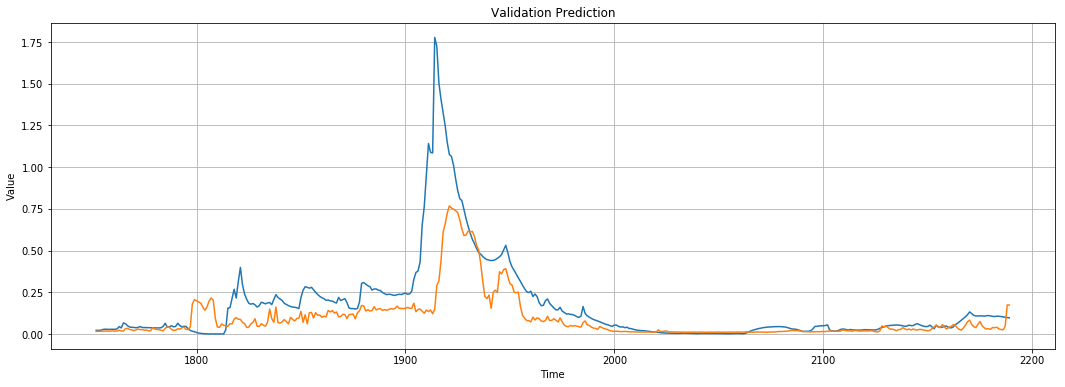

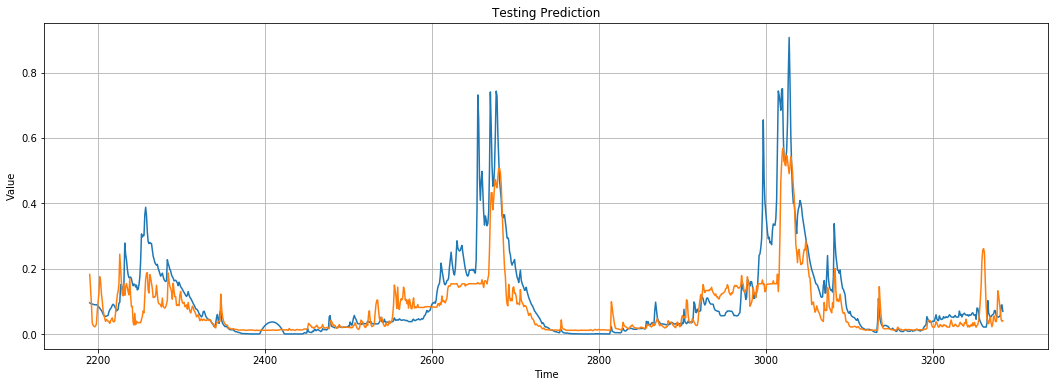

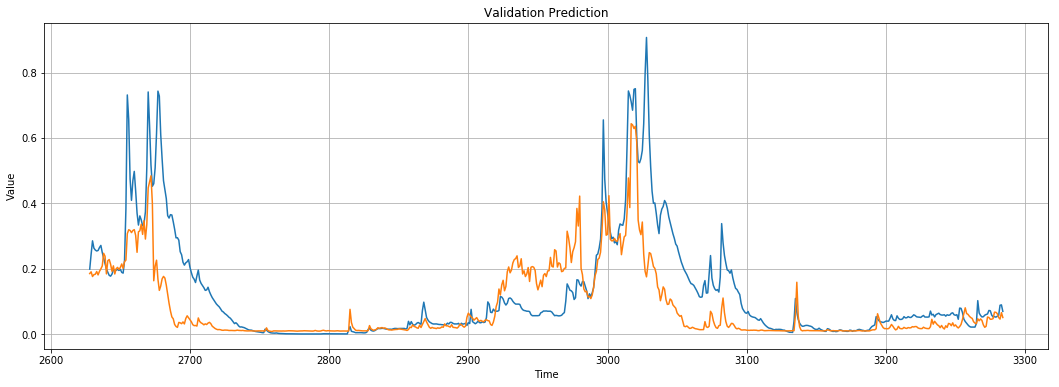

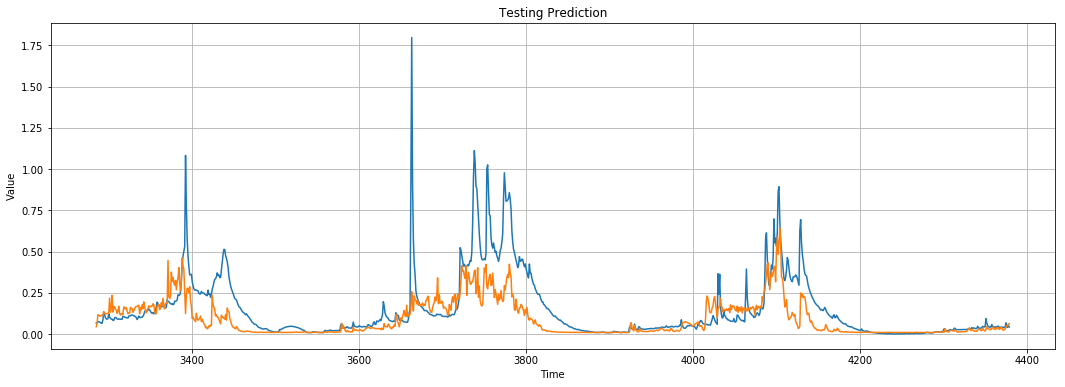

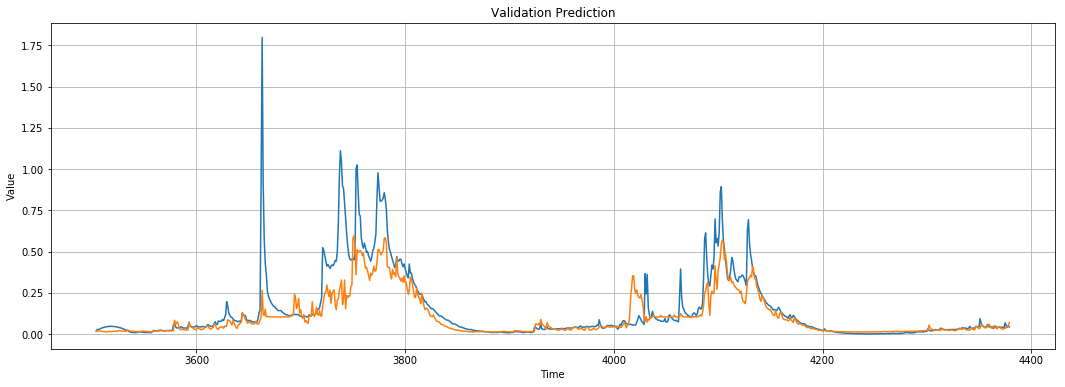

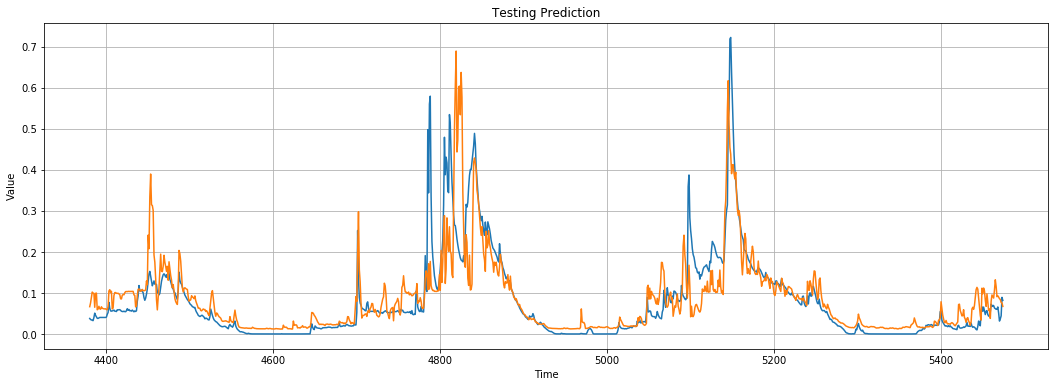

In [0]:
run_yrs(timeSteps = 5, optimizer = "adam", hidden_layer = 0, dropout = 1, dense = 1, plot = True, batch_size = 8, lost_function = 'mean_squared_logarithmic_error', neurons = 50)

#### Overall Parameters Performance:

In [0]:
def testing_parameters(plot):
  TimeSteps = [1, 2, 5, 10]
  Neurons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
  Optimizer = ['adam', 'sgd', 'Adagrad', 'Adadelta', 'RMSProp', 'Nadam']
  Dropout = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  HiddenLayer = [0, 1, 2, 3, 4, 5]
  Dense = [0, 1, 2, 3, 4, 5]
  BatchSize = [1, 8, 16, 32, 64]
  LostFunction = ['mean_squared_error', 'mean_absolute_error', 'mean_squared_logarithmic_error']
  MinError = 1000

  for i in TimeSteps:
    print("Time Step:", i)
    timeSteps = i
    for j in Neurons:
      print("Neuron:", j)
      neurons = j
      for h in Optimizer:
        print("Optimizer:", h)
        optimizer = h
        for g in Dropout:
          print("Dropout:", g)
          dropout = g
          for v in HiddenLayer:
            print("Hidden Layer:", v)
            hidden_layer = v
            for m in Dense:
              print("Dense:", m)
              dense = m
              for n in BatchSize:
                print("Batch Size:", n)
                batch_size = n
                for s in LostFunction:
                  print("Lost Function:", s)
                  lost_function = s
                  error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)
                  if error <= MinError:
                    MinError = error
                    I = i
                    J = j
                    H = h
                    G = g
                    V = v
                    M = m
                    N = n
                    S = s

  print("============================",
        "\nMinimun Error:", MinError,
        "\nTimeSteps:", I,
        "\nNeurons:", J,
        "\nOptimizer:", H,
        "\nDropout:", G,
        "\nHidden Layer:", V,
        "\nDense:", M,
        "\nBatch Size:", N,
        "\nLost Function:", S)

In [0]:
testing_parameters(plot=False)

Time Step: 1
Neuron: 5
Optimizer: adam
Dropout: 0.1
Hidden Layer: 0
Dense: 0
Batch Size: 1
Lost Function: mean_squared_error
M1:

MAE: 0.08027545675343124 
MSE: 0.03297857711578196 
NS: -0.8784425313014985
MAE: 0.04380090065203621 
MSE: 0.006491150171476947 
NS: 0.6504854757851573
Overall Performance: 0.05451536156424212 

M2:

MAE: 0.05214628080578164 
MSE: 0.008245942594960023 
NS: 0.4324158473472345
MAE: 0.05692460540778328 
MSE: 0.01581888283887988 
NS: 0.5785946873385517
Overall Performance: 0.044378570549134945 

M3:

MAE: 0.04637722762442032 
MSE: 0.014901935175530637 
NS: 0.2627268182720346
MAE: 0.039639660948834615 
MSE: 0.0036551610258353812 
NS: 0.6471722279460159
Overall Performance: 0.03485799492487365 

Add-up Overall Performance: 0.1338
Lost Function: mean_absolute_error
M1:

MAE: 0.13120542845198171 
MSE: 0.07106825577642878 
NS: -76.65493202020724
MAE: 0.07190477570554572 
MSE: 0.019022207494050227 
NS: -0.024246493481789644
Overall Performance: 0.09773355580933547 

M

#### different timeStep performance:

In [0]:
def testing_timeStep(optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons):
  TimeStep = [1, 2, 5, 10]
  for i in TimeStep:
    print("TimeStep:", i)
    timeSteps = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_timeStep(optimizer = 'adam', hidden_layer = 0, dropout = 1, dense = 1, plot = False, batch_size = 8, lost_function = 'mean_squared_logarithmic_error')

Time Step: 1
M1:

MAE: 0.06844690475287869 
MSE: 0.028025125679683186 
NS: 0.11226710146565066
MAE: 0.03842423387617768 
MSE: 0.005473763114592784 
NS: 0.7052664535372556
Overall Performance: 0.046790009141110776 

M2:

MAE: 0.056937942462087256 
MSE: 0.008345227124025127 
NS: 0.4588669512232443
MAE: 0.06511207988531012 
MSE: 0.014054307477804385 
NS: 0.6256018900166747
Overall Performance: 0.04814985231640897 

M3:

MAE: 0.044301016781240515 
MSE: 0.012486497911037045 
NS: 0.5890124922877679
MAE: 0.036793007949464204 
MSE: 0.003268022486255379 
NS: 0.6845421898795061
Overall Performance: 0.03228284837599905 

Add-up Overall Performance: 0.1272
Time Step: 2
M1:

MAE: 0.06733537179674963 
MSE: 0.02858375077108308 
NS: 0.07251125383348522
MAE: 0.04063881770517875 
MSE: 0.005847806527665688 
NS: 0.6851589409536741
Overall Performance: 0.047468582266892385 

M2:

MAE: 0.05971151347652479 
MSE: 0.01020698401826829 
NS: 0.23792977125464632
MAE: 0.07172285349456926 
MSE: 0.01740397028566358 


**Result:**

1 | 2 | 5 | 10 
------|--------|-------|--------
0.1272 | 0.1343 | 0.142 | 0.1644

#### different optimizer performance:

In [0]:
def testing_optimizer(timeSteps, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons):
  Optimizer = ['adam', 'sgd', 'Adagrad', 'Adadelta', 'RMSProp', 'Nadam']
  for i in Optimizer:
    print("Optimizer:", i)
    optimizer = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_optimizer(timeSteps = 1, hidden_layer = 0, dropout = 1.0, dense = 1, plot = False, batch_size = 8, lost_function = 'mean_squared_error', neurons = 50)

Optimizer: adam
M1:

MAE: 0.06867193295004705 
MSE: 0.026680636214380025 
NS: 0.047807559393113874
MAE: 0.04046127697295555 
MSE: 0.00556478761681827 
NS: 0.7003652596429853
Overall Performance: 0.0471262112514003 

M2:

MAE: 0.05212728928115288 
MSE: 0.007482069846096453 
NS: 0.6458659631714856
MAE: 0.060803637227590156 
MSE: 0.012769559037267305 
NS: 0.6598267985509977
Overall Performance: 0.044394185130702264 

M3:

MAE: 0.04106253804842627 
MSE: 0.011558660802383052 
NS: 0.6076086931322828
MAE: 0.033686903530657425 
MSE: 0.003212449887770192 
NS: 0.6899065379813241
Overall Performance: 0.029840184089745647 

Add-up Overall Performance: 0.1214
Optimizer: sgd
M1:

MAE: 0.06602556372436268 
MSE: 0.026006039855625825 
NS: -0.023037040725643276
MAE: 0.04341245906237597 
MSE: 0.005006211546195458 
NS: 0.7304416628079282
Overall Performance: 0.04681675806285331 

M2:

MAE: 0.04866719410669232 
MSE: 0.005955137953647283 
NS: 0.6934611039981781
MAE: 0.054798243557176315 
MSE: 0.010947271293

**Result:**

Adam | sgd | Adagrad | Adadelta | RMSProp | Nadam | 
------|--------|-------|--------|---------|-------|
0.1214 | 0.1319 | 0.0977 | 0.099 | 0.0984 | 0.1198 |


#### different dropout rate performance:

In [0]:
def testing_dropout(timeSteps, optimizer, hidden_layer, dense, plot, batch_size, lost_function, neurons):
  Dropout = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  for i in Dropout:
    print("Dropout:", i)
    dropout = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_dropout(timeSteps = 1, optimizer = 'Adagrad', hidden_layer = 0, dense = 1, plot = False, batch_size = 8, lost_function = 'mean_squared_error', neurons = 50)

**Result:**

0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0
------|--------|-------|--------|---------|-------|-----|----|----|---|
0.1468 | 0.1801 | 0.2093 | 0.1858 | 0.2529 | 0.2752 | 0.2826 | 0.2864 | 0.2896 | 0.1383


#### different hidden layer performance:

In [0]:
def testing_hidden_layer(timeSteps, optimizer, dropout, dense, plot, batch_size, lost_function, neurons):
  HiddenLayer = [0, 1, 2, 3, 4, 5]
  for i in HiddenLayer:
    print("Hidden Layer:", i)
    hidden_layer = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_hidden_layer(timeSteps = 1, optimizer = 'adam', dropout = 1.0, dense = 1, plot = False, batch_size = 1, lost_function = 'mean_squared_error', neurons = 50)

Hidden Layer: 0
M1:

MAE: 0.08067702461995667 
MSE: 0.03916174798371165 
NS: -2.0264454222942843
MAE: 0.04956725125009921 
MSE: 0.00810868851945177 
NS: 0.5634659569049695
Overall Performance: 0.059171570791073096 

M2:

MAE: 0.06992363805270106 
MSE: 0.013284954833007932 
NS: 0.656180661415446
MAE: 0.0736404480261305 
MSE: 0.017830372681831384 
NS: 0.525242026878308
Overall Performance: 0.05822647119789029 

M3:

MAE: 0.05035496171501131 
MSE: 0.015309390560520138 
NS: 0.2322719880694567
MAE: 0.04170935003732581 
MSE: 0.0046346587509841644 
NS: 0.5525796022404943
Overall Performance: 0.037336120354613804 

Add-up Overall Performance: 0.1547
Hidden Layer: 1
M1:

MAE: 0.14151447212444618 
MSE: 0.06965053685422361 
NS: -1254712527291344.8
MAE: 0.09261552198790121 
MSE: 0.018616068180974544 
NS: -0.0022024511212825892
Overall Performance: 0.10746553304918184 

M2:

MAE: 0.057444537987960516 
MSE: 0.008189926073278266 
NS: 0.5184980266060792
MAE: 0.06900375624140423 
MSE: 0.015017054533607

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


MAE: 0.14151421312321294 
MSE: 0.06965087990455289 
NS: -inf
MAE: 0.09261458733127684 
MSE: 0.018616099734741428 
NS: -0.0022041498292055817
Overall Performance: 0.10746526003126138 

M2:

MAE: 0.10993315082179049 
MSE: 0.026635681838087077 
NS: -inf
MAE: 0.12048666858674582 
MSE: 0.03988988906486363 
NS: -0.06212266105806674
Overall Performance: 0.09898179677049568 

M3:

MAE: 0.13773439764410675 
MSE: 0.040771341899804345 
NS: -180.31469524565085
MAE: 0.10526279469968833 
MSE: 0.014798756134336512 
NS: -0.42864139772205445
Overall Performance: 0.09952243012597863 

Add-up Overall Performance: 0.306
Hidden Layer: 3
M1:

MAE: 0.14151421312321294 
MSE: 0.06965087990455289 
NS: -inf
MAE: 0.09261458733127684 
MSE: 0.018616099734741428 
NS: -0.0022041498292055817
Overall Performance: 0.10746526003126138 

M2:

MAE: 0.10993312928655068 
MSE: 0.02663568473818745 
NS: -479825839446635.0
MAE: 0.1204866573802561 
MSE: 0.03988989554273062 
NS: -0.06212283354010362
Overall Performance: 0.09898178

**Result:**

0 | 1 | 2 | 3 | 4 | 5 |
------|--------|-------|--------|---------|--------|
0.1547 | 0.2488 | 0.306 | 0.2979 | 0.2687 |  0.2979  |

#### different dense number performance:

In [0]:
def testing_dense(timeSteps, optimizer, hidden_layer, dropout, plot, batch_size, lost_function, neurons):
  Dense = [0, 1, 2, 3, 4, 5]
  for i in Dense:
    print("Dense:", i)
    dense = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_dense(timeSteps = 1, optimizer = 'adam', hidden_layer = 0, dropout = 1.0, plot = False, batch_size = 1, lost_function = 'mean_squared_error', neurons = 50)

**Result:**

0 | 1 | 2 | 3 | 4 | 5 |
------|--------|-------|--------|---------|--------|
 |  |  |  |  |       |

#### different batch size performance:

In [0]:
def testing_batch_size(timeSteps, optimizer, hidden_layer, dropout, dense, plot, lost_function, neurons):
  BatchSize = [1, 8, 16, 32, 64]
  for i in BatchSize:
    print("Batch Size:", i)
    batch_size = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_batch_size(timeSteps = 1, optimizer = 'adam', hidden_layer = 0, dropout = 0.8, dense = 1, plot = False, lost_function = 'mean_squared_error', neurons = 50)

**Result:**

1 | 8 | 16 | 32 | 64 | 
------|--------|-------|--------|---------|
  |  |  |  |  |

#### different lost function performance:

In [0]:
def testing_lost_function(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, neurons):
  LostFunction = ['mean_squared_error', 'mean_absolute_error', 'mean_squared_logarithmic_error']
  for i in LostFunction:
    print("Lost Function:", i)
    lost_function = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_lost_function(timeSteps = 1, optimizer = 'adam', hidden_layer = 0, dropout = 0.8, dense = 1, plot = False, batch_size = 8, neurons = 50)

**Result:**

mean squared error | mean absolute error | mean_squared_logarithmic_error
-------------------| --------------------| ------------------------------
0.3313             |       0.3243        |       0.3128

#### different neurons number performance:

In [0]:
def testing_neuron(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function):
  Neuron = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
  for i in Neuron:
    print("Neuron:", i)
    neurons = i
    error = run_yrs(timeSteps, optimizer, hidden_layer, dropout, dense, plot, batch_size, lost_function, neurons)

In [0]:
testing_neuron(timeSteps = 1, optimizer = 'adam', hidden_layer = 0, dropout = 0.8, dense = 1, plot = False, batch_size = 8, lost_function = 'mean_squared_logarithmic_error')

**Result:**

5 | 10 | 15 | 20 | 25 | 30 | 35 | 40 | 45 | 50 | 55 | 60
--|----|----|----|----|----|----|----|----|----|----|----
  |  |  |  |  |  |  |  |  |  |

## Conclusion



## M4 Final

In [0]:
run_final_model(timeSteps = 5, optimizer = "adam", hidden_layer = 0, dropout = 1, dense = 1, plot = True, batch_size = 8, lost_function = 'mean_squared_logarithmic_error', neurons = 50)

## Prediction